# Part II Project Notebook

Notebook outlining implementation of my Part II Project

In [15]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)

notes:

more features:
```
 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)
```

## ACCESS
> Gaining access to the data, including overcoming availability challenges (data is distributed across architectures, called from an obscure API, written in log books) as well as legal rights (for example intellectual property rights) and individual privacy rights (such as those provided by the GDPR).

Data source will be from Yahoo Finance. Using `yfinance` to easily access this data. 

Dataset consists of past 5 years of historical price data of the following companies:
- AAPL
- GOOG
- MSFT
- AMZN

In [97]:
from access import data

We have the Close, Adjusted Close, Open, Low, High and Volume fields.

In [98]:
AAPL = data("aapl")
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,40.175170,40.680428,39.962675,40.670982,102223600,0.0,0.0
2018-01-03 00:00:00-05:00,40.734726,41.211654,40.600150,40.663895,118071600,0.0,0.0
2018-01-04 00:00:00-05:00,40.737077,40.956654,40.628472,40.852768,89738400,0.0,0.0
2018-01-05 00:00:00-05:00,40.949579,41.405254,40.857499,41.317898,94640000,0.0,0.0
2018-01-08 00:00:00-05:00,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0


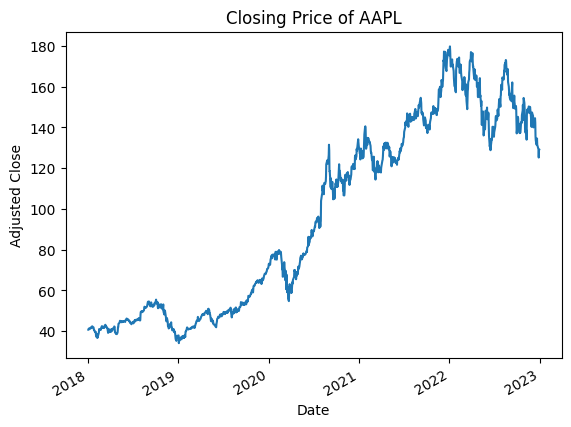

In [99]:
AAPL['Close'].plot()
plt.ylabel('Adjusted Close')
plt.title(f"Closing Price of AAPL")

plt.show()


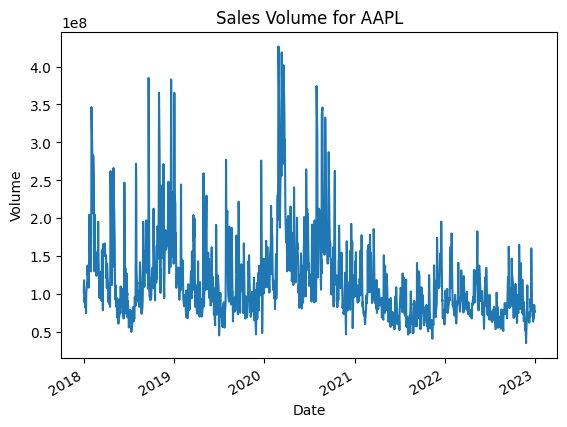

In [100]:
AAPL['Volume'].plot()
plt.ylabel('Volume')
plt.title(f"Sales Volume for AAPL")
    
plt.show()

## ASSESS
> Understanding what is in the data. Is it what it's purported to be, how are missing values encoded, what are the outliers, what does each variable represent and how is it encoded.

> (T)he aim in assess is to only do work that is repeatable, and make that work available to others who may also want to use the data.

We look at:
1. change in price of the stock over time?
2. daily return of the stock on average?
3. moving average of the various stocks?
4. correlation between different stocks'?
5. how much value do we put at risk by investing in a particular stock?

Let's introduce a few additional features that we may find useful to include in our models. 

First, the Moving Average (MA), which is a common and simple technical analysis indicator. It smooths out volatility.

In [101]:
import assess

AAPL = assess.generate_features(AAPL)
AAPL

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close Forecast,SMA_10,SMA_20,SMA_50,EMA_10,EMA_20,EMA_50,RSI_14,upper_band,middle_band,lower_band,macd,macdsignal,macdhist,OBV,ADX,AD,Aroon_down,Aroon_up,SlowK,SlowD,Williams %R,pct_change
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,40.175170,40.680428,39.962675,40.670982,102223600,0.0,0.0,40.663895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022236e+08,NaN,9.953294e+07,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00-05:00,40.734726,41.211654,40.600150,40.663895,118071600,0.0,0.0,40.852768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.584800e+07,NaN,6.077616e+06,NaN,NaN,NaN,NaN,NaN,-0.000174
2018-01-04 00:00:00-05:00,40.737077,40.956654,40.628472,40.852768,89738400,0.0,0.0,41.317898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.389040e+07,NaN,3.900288e+07,NaN,NaN,NaN,NaN,NaN,0.004645
2018-01-05 00:00:00-05:00,40.949579,41.405254,40.857499,41.317898,94640000,0.0,0.0,41.164433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.685304e+08,NaN,1.034563e+08,NaN,NaN,NaN,NaN,NaN,0.011386
2018-01-08 00:00:00-05:00,41.164433,41.461920,41.065266,41.164433,82271200,0.0,0.0,41.159710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.625920e+07,NaN,6.232180e+07,NaN,NaN,NaN,NaN,NaN,-0.003714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,130.026375,131.516136,128.755113,130.959961,63814900,0.0,0.0,129.142456,135.904968,139.700882,143.075664,135.005245,138.262166,142.417588,35.694644,150.916157,139.700882,128.485607,-3.629849,-2.530715,-1.099135,2.204628e+09,13.826138,5.634818e+09,100.000000,0.000000,35.933492,29.521515,-89.080165,-0.002798
2022-12-27 00:00:00-05:00,130.483247,130.513041,127.841400,129.142456,69007800,0.0,0.0,125.179680,134.468839,138.996226,142.914356,133.939283,137.393622,141.896994,33.675332,150.979276,138.996226,127.013176,-3.894686,-2.803509,-1.091177,2.135620e+09,14.533699,5.633022e+09,100.000000,35.714286,25.770002,30.702159,-93.835300,-0.013878
2022-12-28 00:00:00-05:00,128.784900,130.135617,125.010842,125.179680,85438400,0.0,0.0,128.725311,132.539101,138.244889,142.593875,132.346628,136.230390,141.241413,29.726628,151.632269,138.244889,124.857509,-4.373915,-3.117590,-1.256324,2.050182e+09,15.664271,5.553213e+09,100.000000,28.571429,16.236404,25.979966,-99.294613,-0.030685


In [102]:
AAPL.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Close Forecast', 'SMA_10', 'SMA_20', 'SMA_50', 'EMA_10', 'EMA_20',
       'EMA_50', 'RSI_14', 'upper_band', 'middle_band', 'lower_band', 'macd',
       'macdsignal', 'macdhist', 'OBV', 'ADX', 'AD', 'Aroon_down', 'Aroon_up',
       'SlowK', 'SlowD', 'Williams %R', 'pct_change'],
      dtype='object')

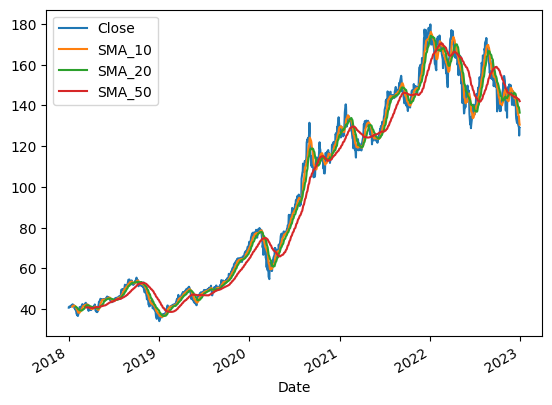

In [103]:
AAPL[["Close", "SMA_10", "SMA_20", "SMA_50"]].plot()
plt.show()

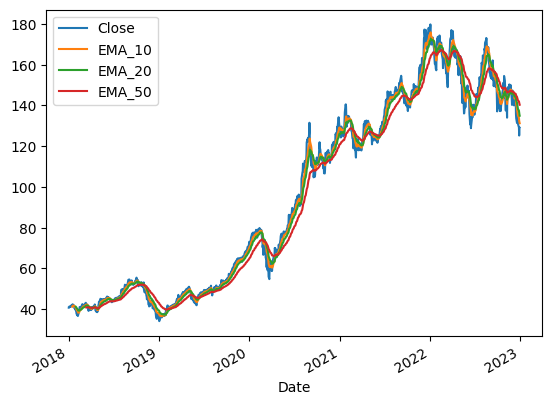

In [104]:
AAPL[["Close", "EMA_10", "EMA_20", "EMA_50"]].plot()
plt.show()

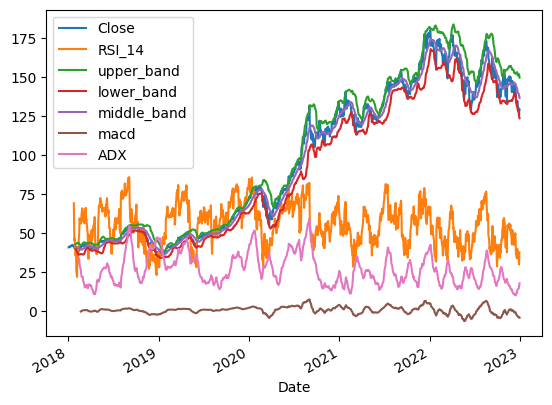

In [105]:
AAPL[["Close", "RSI_14", "upper_band", "lower_band", "middle_band", "macd", "ADX"]].plot()
plt.show()

Now daily returns!

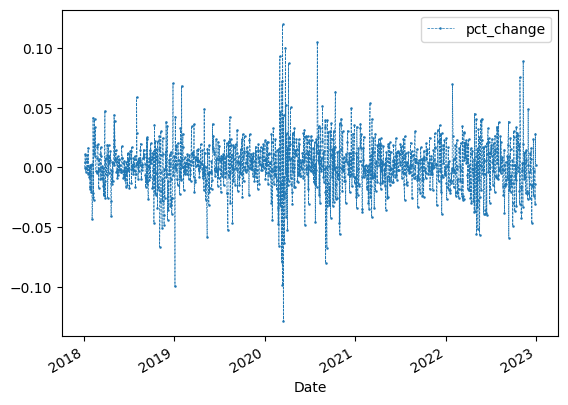

In [106]:
AAPL['pct_change'].plot(legend=True, linestyle='--', marker='o', linewidth=0.5, markersize=0.8)
plt.show()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure

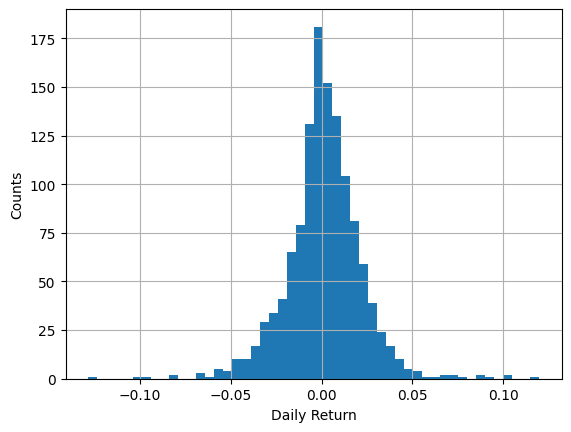

In [107]:
AAPL['pct_change'].hist(bins=50)
plt.ylabel('Counts')
plt.xlabel("Daily Return")

plt.show()

## ADDRESS

In [5]:
import assess
from address import plot, evaluate

In [6]:
df = assess.data()

### Baseline Model

In [7]:
from address import model_0

preds, obs = model_0(df)

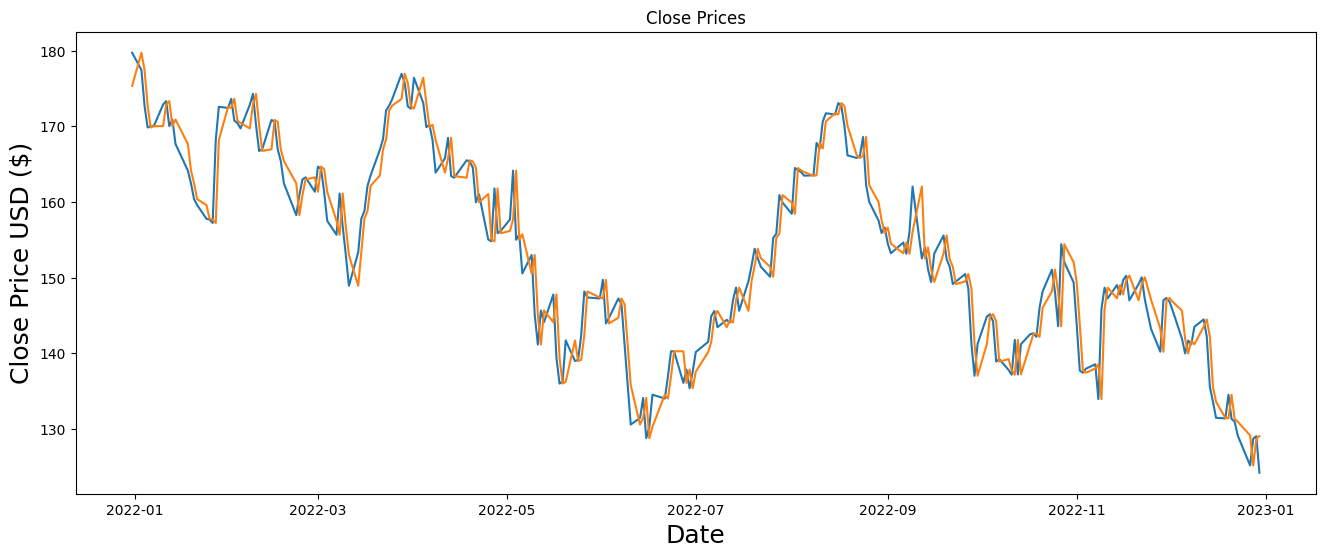

In [8]:
plot(preds, obs)

### Linear Model

Max lookback

In [445]:
from address import model_1

preds, obs = model_1(AAPL)

R^2: 0.9276885608377885
MSE: 11.91847712323527
RMSE: 3.4523147485759855
MAE: 2.7387731125725923
MAPE: 1.8109258661114518


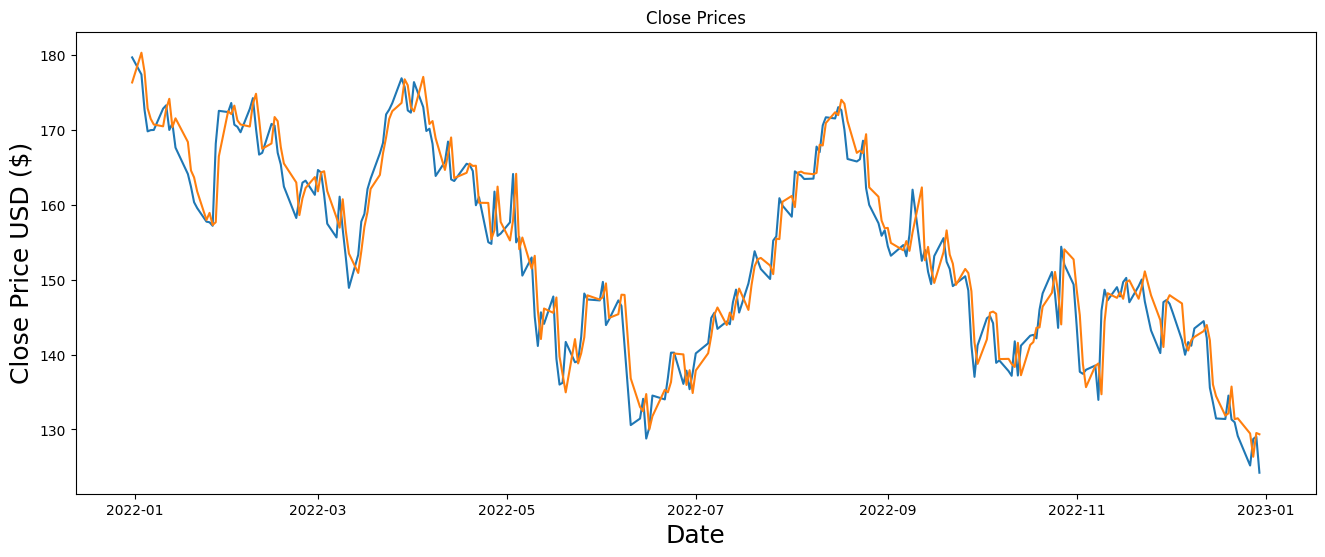

In [404]:
plot(preds, obs)

N-day lookback

In [405]:
from address import model_1_1

preds, obs, (r2, mse, rmse, mae, mape)= model_1_1(AAPL, 1)

R^2: 0.9303330012207015
MSE: 11.48261659310799
RMSE: 3.388600978738569
MAE: 2.6411937229217046
MAPE: 1.7461283816400368


In [371]:
N_max = 1001
RMSE = []
for n in range(1, N_max, 50):
    preds, obs, (r2, mse, rmse, mae, mape)= model_1_1(AAPL, n)
    RMSE.append(rmse)

R^2: 0.9303330012207015
MSE: 11.48261659310799
RMSE: 3.388600978738569
MAE: 2.6411937229217046
MAPE: 1.7461283816400368
R^2: 0.752992245520691
MSE: 40.71217922270052
RMSE: 6.380609627825582
MAE: 4.8610955884501434
MAPE: 3.22892806431302
R^2: 0.885354513972999
MSE: 18.896036620566303
RMSE: 4.346957168016071
MAE: 3.4296848872303762
MAPE: 2.268756778200705
R^2: 0.9048267061946575
MSE: 15.686601429925581
RMSE: 3.9606314433339516
MAE: 3.1484463948368977
MAPE: 2.081643412462376
R^2: 0.9167776498458097
MSE: 13.716829424865486
RMSE: 3.7036238233472747
MAE: 2.9094827346189924
MAPE: 1.9221411960373727
R^2: 0.9181498462338541
MSE: 13.490662010014189
RMSE: 3.672963654872478
MAE: 2.931529725246949
MAPE: 1.9389315645764638
R^2: 0.9232334057770122
MSE: 12.65278229386279
RMSE: 3.557074963205413
MAE: 2.821125512410903
MAPE: 1.8645255861883105
R^2: 0.9250420265769953
MSE: 12.354682769376044
RMSE: 3.514922868197259
MAE: 2.792007258045861
MAPE: 1.8433743339533941
R^2: 0.9267719690457525
MSE: 12.0695511224

(0.0, 30.0)

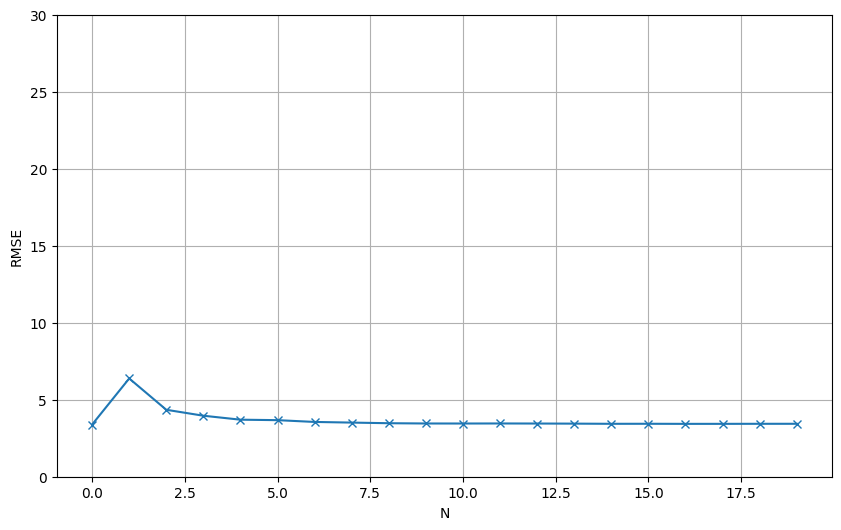

In [283]:
plt.plot(RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.ylim([0, 30])

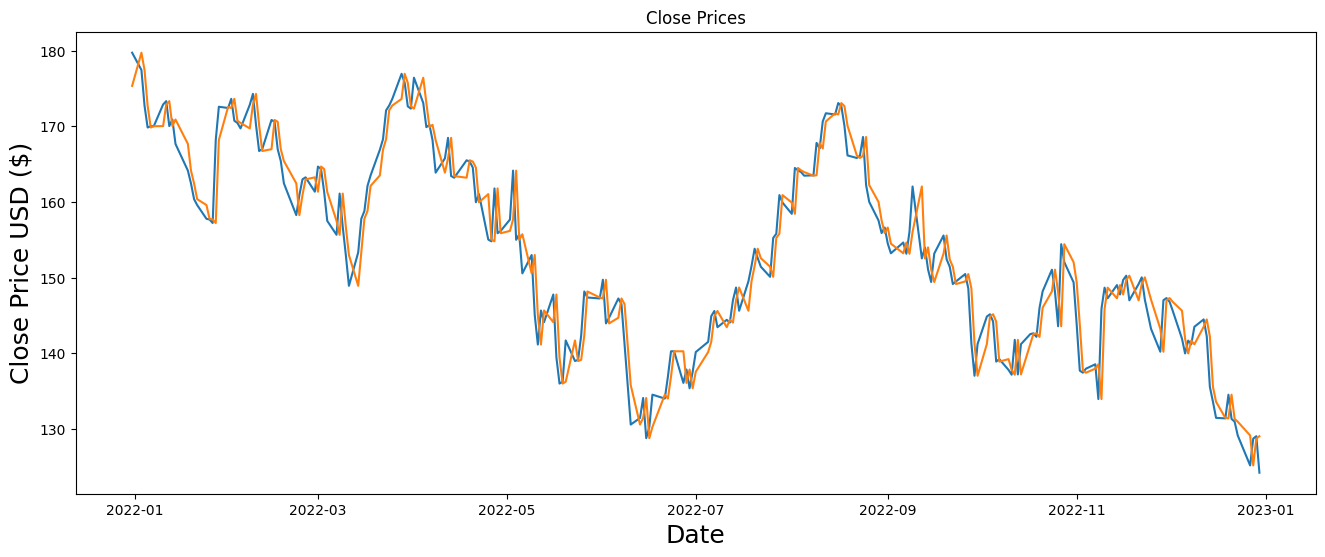

In [406]:
plot(preds, obs)

### ARIMA Model

AR emphasises dependent relationship between observation and preceding/lagged observations. MA focuses on relationship between an observation and the residual error from a MA model based on lagged observations.
- $p$ is the lag order (no. lag observations incorporated in the model)
- $d$ is the differencing degree
- $q$ is the order of the MA window

Time series analysis only works with stationary data so we must first check that with the ADF (Augmented Dickey-Fuller) test.

DF is a popular statistical test used to determine the presence of unit root in the series (hence help us understand if the series is stationary or not).

- Null hypothesis: series has unit root (value of $a=1$)
- Alternate hypothesis: series has no unit root

If we fail to reject the null hypothesis, we can say the series is non-stationary. This means the series is linear or difference stationary. If both mean and standard deviation are flat lines (i.e. const. mean and const. variance), the series becomes stationary.

In [9]:
from address import test_stationarity

In [10]:
_df = df["Close"]

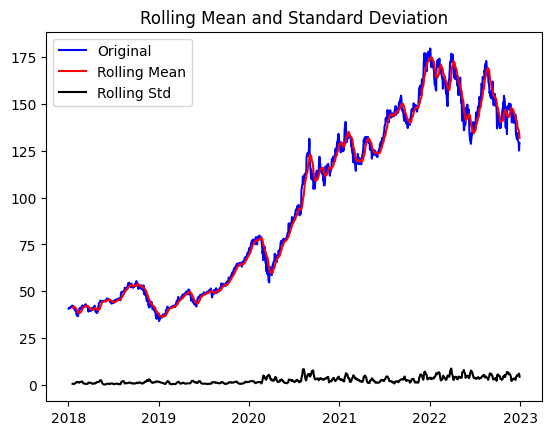

Results of dickey fuller test
Test Statistics           -1.063803
p-value                    0.729289
# lags used               11.000000
# observations used     1247.000000
critical value (1%)       -3.435605
critical value (5%)       -2.863861
critical value (10%)      -2.568005
dtype: float64
Weak evidence against null hypothesis, so cannot reject. Data is non-stationary.


In [11]:
test_stationarity(_df)

p-value is greater than 0.05 so we cannot reject the Null hypothesis (with 5% significance). Also, test statistic is greater than the critical values so data is non-stationary.

In [12]:
_df_d1 = _df - _df.shift(1)

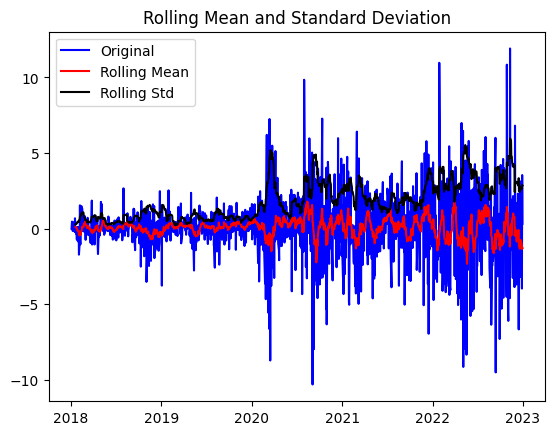

Results of dickey fuller test
Test Statistics        -1.046032e+01
p-value                 1.364395e-18
# lags used             1.000000e+01
# observations used     1.247000e+03
critical value (1%)    -3.435605e+00
critical value (5%)    -2.863861e+00
critical value (10%)   -2.568005e+00
dtype: float64
Evidence against null hypothesis, so reject. Data is stationary.


In [13]:
test_stationarity(_df_d1.dropna())

ACF is bar chart of coefficients of correlation between time series and lags of itself. The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself. 

In general, the partial correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specific set of other variables.e.g. if we are regressing Y on variables X1, X2, X3, the partial correlation between Y and X3 is the amount of correlation between Y and X3 that is not explained by their common correlations with X1 and X2. This can be computed as the square root of the reduction in variance that is achieved by adding X3 to the regression of Y on X1 and X2.

A partial *auto*correlation is the amount of correlation bewteen a variable and a lag of itself that is not explained by correlations at all lower-order tags.

Here is ACF of undifferenced series

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(_df,lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(_df,lags=100,ax=ax2)

NameError: name 'plt' is not defined

Autocorrelations are significant for a large no. lags, but autocorrelations at lag some number and above are merely due to the propagation of the autocorrelation at the preceding lags.

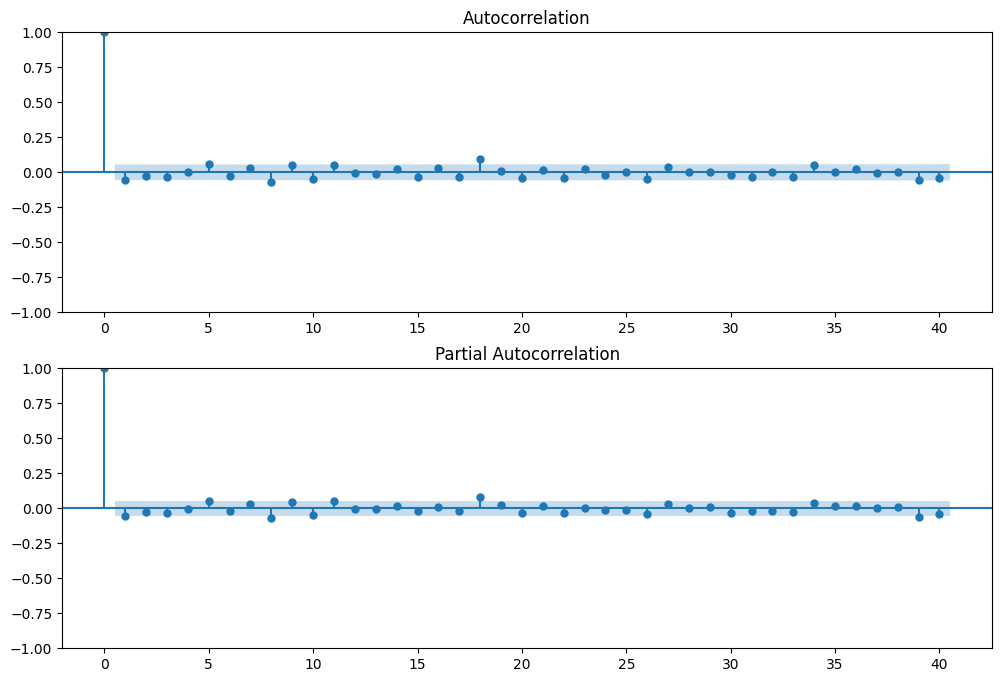

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(_df_d1.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(_df_d1.dropna(),lags=40,ax=ax2)

In [17]:
from address import model_2

preds, obs = model_2(df)


In [19]:
evaluate(preds, obs, verbose=True)

R^2: 0.9299649425892824
MSE: 11.543280839330167
RMSE: 3.397540410257127
MAE: 2.6515946784015547
MAPE: 1.7529867498196474


(0.9299649425892824,
 11.543280839330167,
 3.397540410257127,
 2.6515946784015547,
 1.7529867498196474)

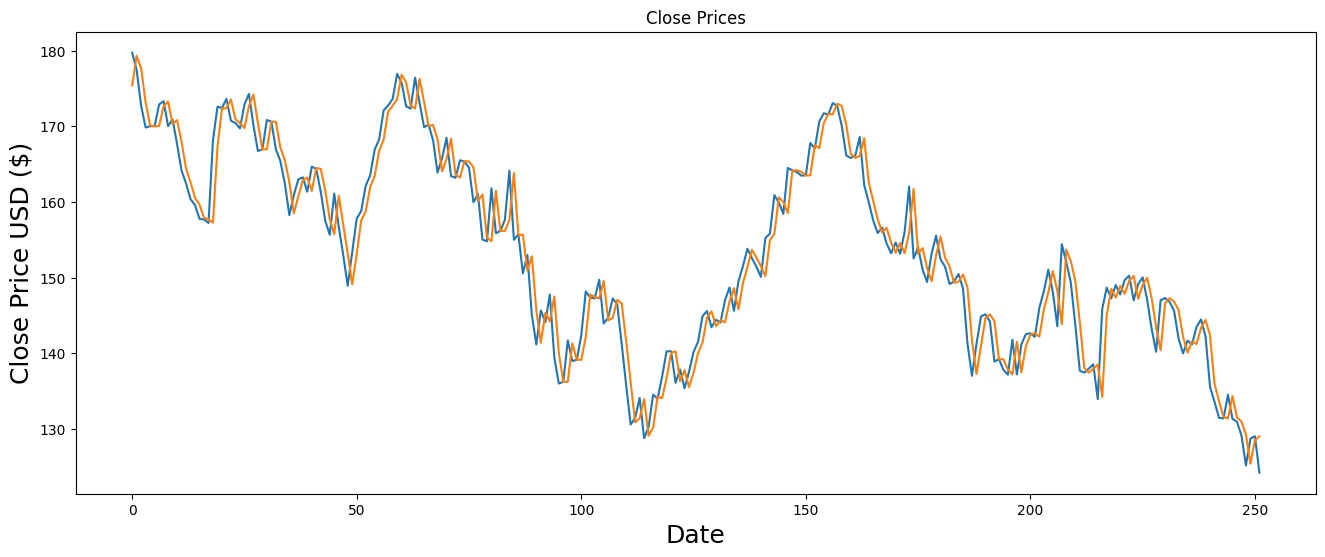

In [ ]:
plot(preds, obs)

### LSTM Network

In [407]:
from address import model_3

pred, obs = model_3(df)

8/8 [==============================] - 1s 38ms/step


In [408]:
evaluate(pred, obs, verbose=True)

R^2: 0.8533138863501686
MSE: 23.780023465920017
RMSE: 4.8764765421275245
MAE: 3.9255082939725474
MAPE: 2.600630011866571


(0.8533138863501686,
 23.780023465920017,
 4.8764765421275245,
 3.9255082939725474,
 2.600630011866571)

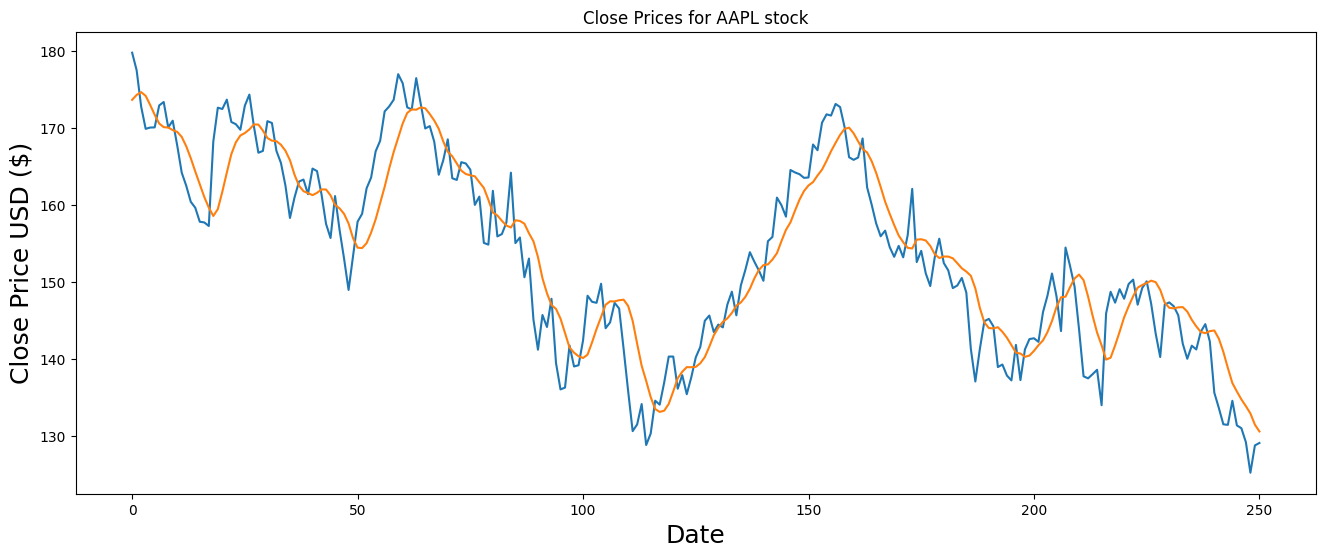

In [409]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Close Prices for AAPL stock')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(obs)
plt.plot(pred)
plt.show()

### XGBoost

In [410]:
from address import model_4

In [417]:
df = assess.data()

[0]	validation_0-rmse:89.98871	validation_1-rmse:151.78564


/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:34:19] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:33.42142	validation_1-rmse:58.71665
[200]	validation_0-rmse:12.50360	validation_1-rmse:25.43731
[300]	validation_0-rmse:4.84222	validation_1-rmse:12.73703
[400]	validation_0-rmse:2.20798	validation_1-rmse:8.53519
[500]	validation_0-rmse:1.45726	validation_1-rmse:7.20626
[600]	validation_0-rmse:1.26248	validation_1-rmse:6.75726
[700]	validation_0-rmse:1.18471	validation_1-rmse:6.59992
[800]	validation_0-rmse:1.14703	validation_1-rmse:6.50050
[900]	validation_0-rmse:1.12133	validation_1-rmse:6.49028
[968]	validation_0-rmse:1.10351	validation_1-rmse:6.49097


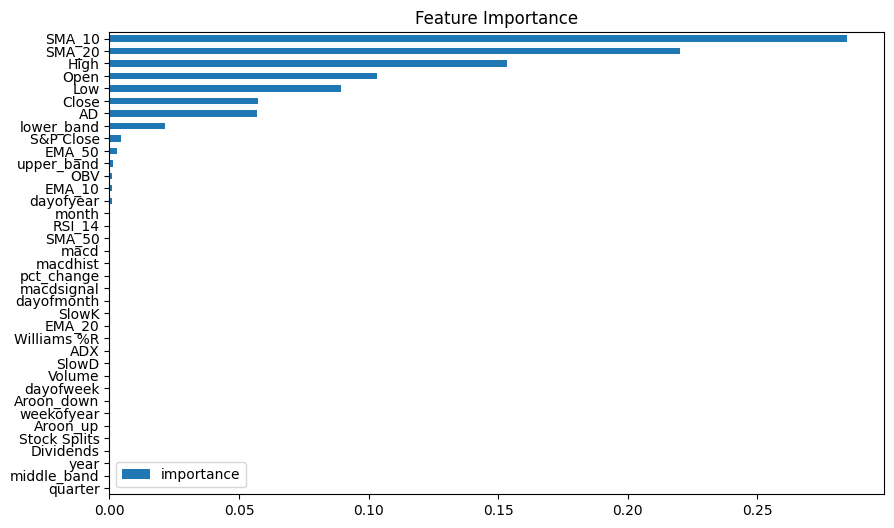

R^2: 0.7446912510325446
MSE: 42.08036127042798
RMSE: 6.486937742142126
MAE: 5.280645037454272
MAPE: 3.3346119278548594


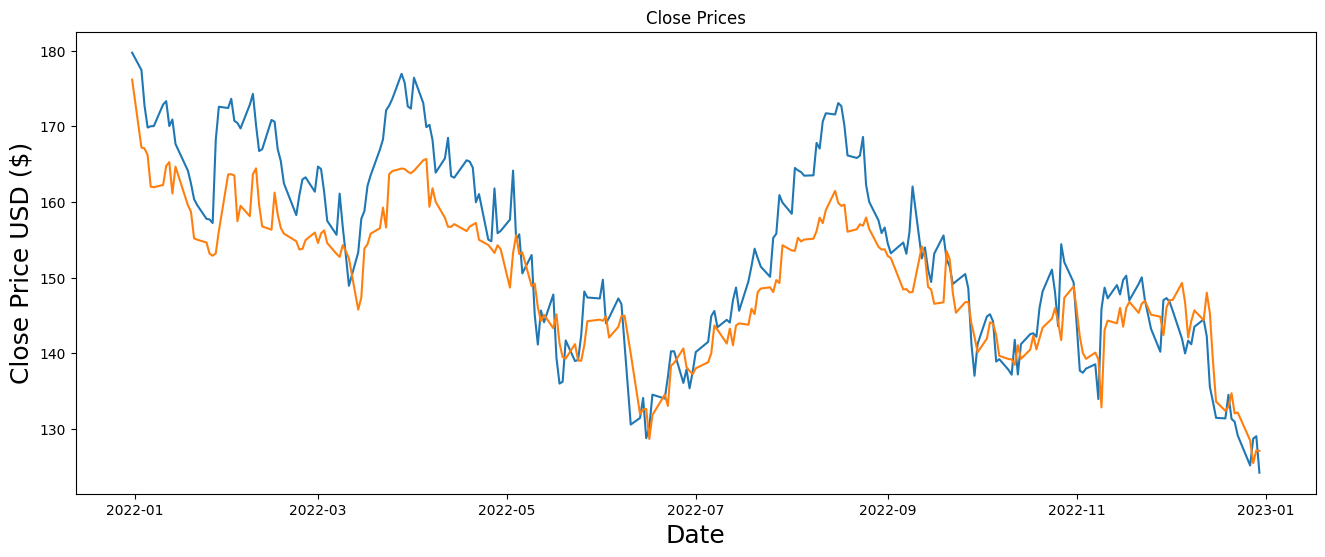

In [423]:
preds, obs = model_4(df)
evaluate(preds, obs, True)
plot(preds, obs)

## Trading

For a given date, $t$, if our model predicts the Close price at $t+1$ to be higher than the Open of $t+1$, we will buy at the $t+1$ Open price, and sell at the observed Close price on $t+1$. Conversly, if our model predicts the Close price at $t+1$ to be lower than the Open of $t+1$, we will sell at the $t+1$ Open price, and buy back at the observed Closed price on $t+1$. 

Hence, we do not hold a position overnight, and buy/sell at the Open and Close of each trading day.

In [106]:
from address import evaluate, trade, trade_buy_hold, trade_sell_hold, model_0, model_1, model_1_1, model_2, model_3, model_4
from assess import data

In [97]:
df = data()

In [104]:
trade_buy_hold(df)

2019-01-02: Buy @    37.12
2022-12-30: Sell @   129.04
PNL: 91.92421555224718


91.92421555224718

In [108]:
trade_sell_hold(df)

2019-01-02: Buy @   129.04
2022-12-30: Sell @    37.12
PNL: -91.92421555224718


-91.92421555224718

In [89]:
preds, obs = model_0(df)
evaluate(preds, obs, verbose=True)
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")

R^2: 0.9303330172893491
MSE: 11.48261384657027
RMSE: 3.3886005734772384
MAE: 2.6411929357619512
MAPE: 1.7461279685042987
PNL: -1.8655794875161718


In [90]:
preds, obs = model_1(df)
evaluate(preds, obs, verbose=True)
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")

R^2: 0.9222193783632222
MSE: 12.819915665226095
RMSE: 3.5804909810284533
MAE: 2.8541082641210633
MAPE: 1.8925030666777722
PNL: -4.362365297527575


In [91]:
preds, obs = model_2(df)
evaluate(preds, obs, verbose=True)
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")

R^2: 0.9299650126061847
MSE: 11.543268915960272
RMSE: 3.397538655550555
MAE: 2.651591687607462
MAPE: 1.752984815753418
PNL: -20.181111552381125


In [92]:
preds, obs = model_3(df)
evaluate(preds, obs, verbose=True)
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")

8/8 [==============================] - 0s 13ms/step
R^2: 0.8114405043817081
MSE: 30.568327718228844
RMSE: 5.528863148806348
MAE: 4.407940989946464
MAPE: 2.857557147959745
PNL: 40.28839554736105


[0]	validation_0-rmse:89.98871	validation_1-rmse:151.78564
[100]	validation_0-rmse:33.42132	validation_1-rmse:58.69319


/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:12.50351	validation_1-rmse:25.46468
[300]	validation_0-rmse:4.84223	validation_1-rmse:12.72319
[400]	validation_0-rmse:2.20781	validation_1-rmse:8.52259
[500]	validation_0-rmse:1.45820	validation_1-rmse:7.15920
[600]	validation_0-rmse:1.26293	validation_1-rmse:6.71856
[700]	validation_0-rmse:1.18788	validation_1-rmse:6.57946
[800]	validation_0-rmse:1.14779	validation_1-rmse:6.47725
[900]	validation_0-rmse:1.12221	validation_1-rmse:6.46595
[953]	validation_0-rmse:1.10728	validation_1-rmse:6.46766


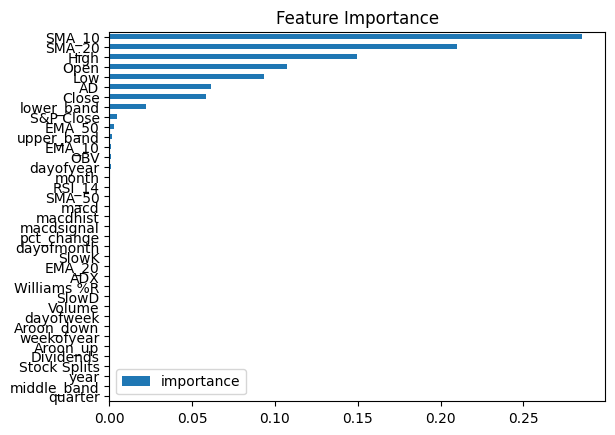

R^2: 0.7463795217855408
MSE: 41.80209765958323
RMSE: 6.465454172723153
MAE: 5.269518443516323
MAPE: 3.328000776741268
PNL: 63.59557003130648


In [93]:
preds, obs = model_4(df)
evaluate(preds, obs, verbose=True)
pnl = trade(df, preds, verbose=False)
print(f"PNL: {pnl}")